In [1]:
#Library Imports
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/aryan/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Defining Gradient Descent
def gradient_descent(alpha,x,y,ep=0.001, max_iter=1000):
    converged  = False
    iter = 0
    m = len(x) #Number of samples
    t0 = np.random.random(x.shape[1]) #Initial value of theta0
    t1 = np.random.random(x.shape[1]) #Initial value of theta1
    
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) #Initial Error
    
    while not converged:
        
        grad0 = 1.0/m*(sum([(t0+t1*x[i]-y[i]) for i in range(m)]))
        grad1 = 1.0/m*(sum([(t0+t1*x[i]-y[i])*x[i] for i in range(m)]))
        
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1
        
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] )
        
        # Convergence takes place either 
        # 1)after completing all the iterations or 
        # 2)if error difference current and prev is less than some value here(0.0001)
        
        if abs(J-e)<0.0001:
            print ("Converged successfully")
            converged = True
        
        
        if iter==max_iter:
            converged = True
        
        J=e
        iter+=1
        
    return t0,t1

In [3]:
#Making Data
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
print ('x.shape = %s y.shape = %s' %(x.shape, y.shape))

x.shape = (100, 1) y.shape = (100,)


Initial scatter plot


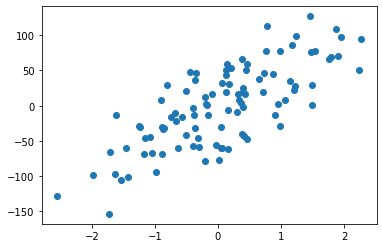

In [4]:
#Declaring Training variables and checking out the data
alpha = 0.01
ep = 0.01

print ("Initial scatter plot")
plt.scatter(x,y)
plt.show()

In [5]:
#Training and finding the slope and intercept for the line
theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
print ('theta0 = %s theta1 = %s' %(theta0, theta1))

Converged successfully
theta0 = [-2.84591409] theta1 = [43.19799347]


Line plot after finding intercept and slope


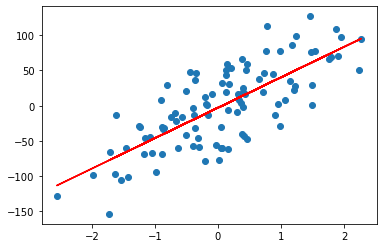

In [6]:
#Plotting the final line through the data
print ("Line plot after finding intercept and slope")
plt.scatter(x,y)
plt.plot(x, theta0+x*theta1, 'r')
plt.show()